<a href="https://colab.research.google.com/github/HasangaDineliKavindya/HIV_Risk_Prediction_Model/blob/main/HIV_Risk_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib



In [62]:
# Load datasets
art_coverage = pd.read_csv("/art_coverage_by_country_clean.csv")
art_pediatric = pd.read_csv("/art_pediatric_coverage_by_country_clean.csv")
adult_cases = pd.read_csv("/no_of_cases_adults_15_to_49_by_country_clean.csv")
deaths = pd.read_csv("/no_of_deaths_by_country_clean.csv")
living_with_hiv = pd.read_csv("/no_of_people_living_with_hiv_by_country_clean.csv")
prevention_mtc = pd.read_csv("/prevention_of_mother_to_child_transmission_by_country_clean.csv")



In [63]:
# Preprocess the dataset
def preprocess_column(column):
    # Extract median values from ranges (e.g., "7200[4100–11000]")
    return column.str.extract(r'(\d+)\[.*\]').fillna(method='ffill').astype(float)[0]




In [64]:
# Apply preprocessing to necessary columns
columns_to_preprocess = [
    'Estimated number of people living with HIV',
    'Estimated ART coverage among people living with HIV (%)'
]

for col in columns_to_preprocess:
    if col in art_coverage.columns:
        art_coverage[col] = preprocess_column(art_coverage[col])



<ipython-input-63-a5d41ec5e4a5>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return column.str.extract(r'(\d+)\[.*\]').fillna(method='ffill').astype(float)[0]
<ipython-input-63-a5d41ec5e4a5>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  return column.str.extract(r'(\d+)\[.*\]').fillna(method='ffill').astype(float)[0]


In [65]:
# Merge datasets (if applicable)
data = art_coverage  # Assuming art_coverage is the primary dataset

# Handle missing values
data = data.dropna()

# Feature selection
features = [
    'Reported number of people receiving ART',
    'Estimated number of people living with HIV',
    'Estimated ART coverage among people living with HIV (%)'
]

data = data[features]

data['Risk Category'] = pd.qcut(
    data['Estimated ART coverage among people living with HIV (%)'],
    q=3,
    labels=['Low', 'Medium', 'High']
)



In [66]:
# Train-test split
X = data[features]
y = data['Risk Category']

if len(X) == 0 or len(y) == 0:
    raise ValueError("Dataset is empty after preprocessing. Please check the data source and preprocessing steps.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data scaling (optional, depending on the model requirements)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model
joblib.dump(clf, 'social_disease_model.pkl')

# Feature importance
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)



Accuracy: 0.9285714285714286
Classification Report:
               precision    recall  f1-score   support

        High       0.92      1.00      0.96        12
         Low       1.00      0.90      0.95        10
      Medium       0.83      0.83      0.83         6

    accuracy                           0.93        28
   macro avg       0.92      0.91      0.91        28
weighted avg       0.93      0.93      0.93        28

                                             Feature  Importance
2  Estimated ART coverage among people living wit...    0.712247
0            Reported number of people receiving ART    0.150927
1         Estimated number of people living with HIV    0.136827


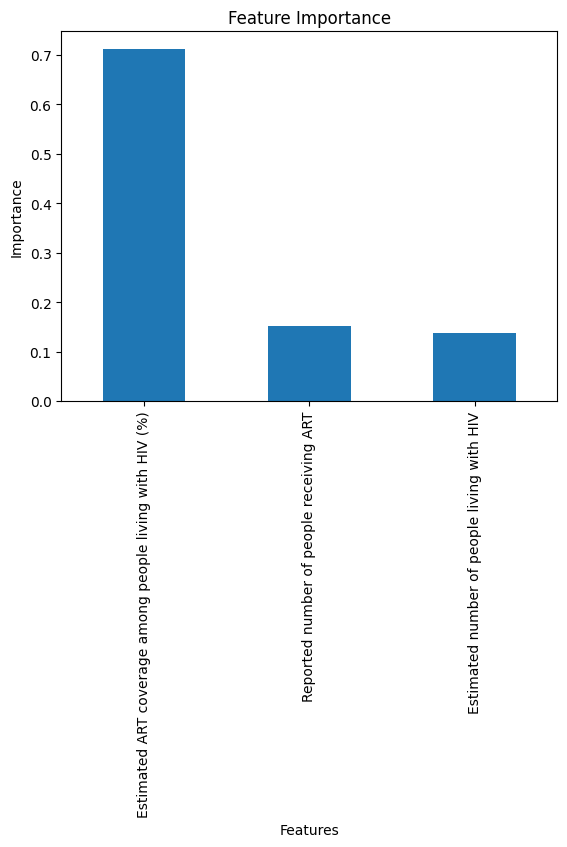

In [67]:
# Visualization (optional)
import matplotlib.pyplot as plt
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [68]:
!pip install joblib


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import joblib

# Example: Train a simple model
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'trained_model.joblib')
print("Model saved as 'trained_model.joblib'")


Model saved as 'trained_model.joblib'


In [70]:
from google.colab import files
files.download('trained_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
# Load the saved model
loaded_model = joblib.load('trained_model.joblib')

# Test the loaded model
predictions = loaded_model.predict(X_test)
print("Predictions:", predictions)


Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [72]:
# Install Git (if not already installed)
!apt-get install git

# Configure your Git user (replace with your name and email)
!git config --global user.name "HasangaDineliKavindya"
!git config --global user.email "hasangakavindya@gmail.com"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [73]:
!pip install requests
